<center>

# Python for Quantum Mechanics: 
# Week 5: Excercises

</center>

## Exercise 1: Noise in qubits

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

$$|000\rangle,\ |001\rangle,\ |010\rangle,\ |011\rangle,\ |100\rangle,\ |101\rangle,\ |110\rangle,\ |111\rangle$$
Run the following cell to generate a data set of 100 numbers between 0 and 7 inclusively called `count`. The array `freq` will give the frequency that each Label the numbers, 0 to 7, with the strings in `qbits_vals`.

In [4]:
count = np.random.randint(8)*np.ones(20)
count = np.append(count,np.random.randint(8,size=80))
freq = np.histogram(count,bins=np.arange(-.5,8.5,1))[0]

qubits_vals = [format(i,'03b') for i in range(8)]
qubits_labels = [r'$|' + qubits_val + r'\rangle$' for qubits_val in qubits_vals]

Make a histogram and pie chart of the data. Explode out the largest section in the pie chart. 

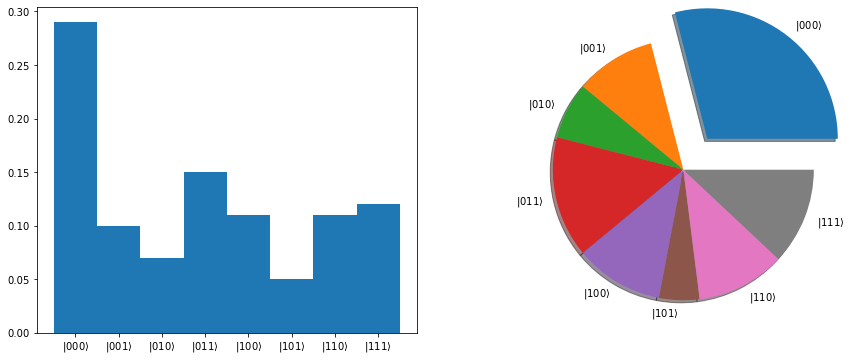

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].hist(count,bins=np.arange(0,9,1)-.5,density=True)
ax[0].set_xticks([0,1,2,3,4,5,6,7])
ax[0].set_xticklabels(qubits_labels)

idx_max = np.where(freq==np.max(freq))
expl = np.zeros(8)
expl[idx_max] = .3

ax[1].pie(freq, labels=qubits_labels, explode=expl, shadow=True)

plt.show()

## Exercise 2: Particle in a Box

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The eigenfunctions of a particle in a 1D box are
$$\psi_n(x) = \sqrt{\frac{2}{l}} \sin \left( \frac{n \pi x}{l} \right).$$

In [20]:
def psi(n,x):
    return np.sqrt(2/l) * np.sin(n*np.pi*x/l)

Make a plot of some of these wavefunctions (changing $n \in \mathbb{N}$).

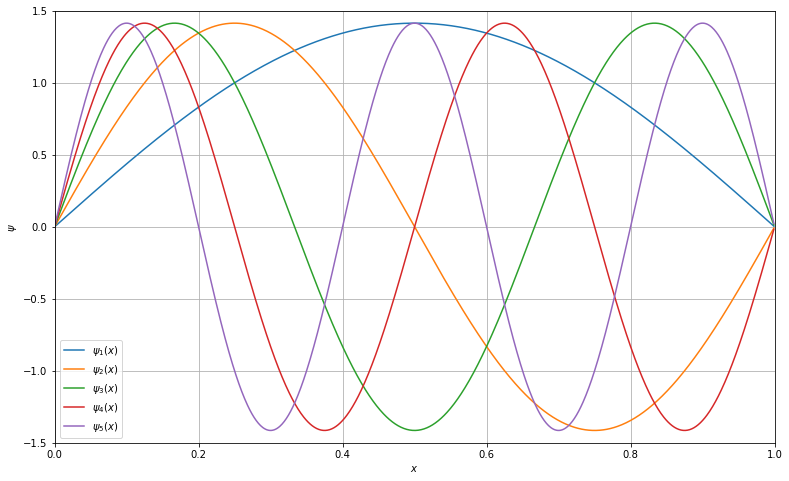

In [21]:
l=1
x=np.arange(0,l,.001)

fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])

for n in range(1,6):
    ax.plot(x,psi(n,x),label='$\psi_'+str(n)+'(x)$')

ax.set_xlim(0,1)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$\psi$')

ax.legend()
ax.grid()

plt.show()

The the eigenfunctions of a particle in a 2D box are
$$\psi_{(n,m)}(x) = \frac{2}{l} \sin \left( \frac{n \pi x}{l_x} \right) \sin \left( \frac{m \pi y}{l_y} \right).$$

In [22]:
def psi2d(n,m,x,y,lx,ly):
    return (2/np.sqrt(lx*ly)) * np.sin(n*np.pi*x/lx) * np.sin(m*np.pi*y/ly)

Make a plot of this using 3D plot.

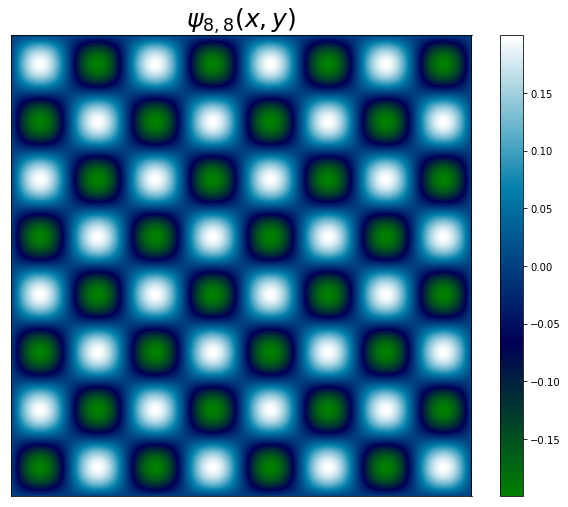

In [23]:
lx=10
ly=10

n=8
m=8

xs=np.arange(0,lx,.01)
ys=np.arange(0,ly,.01)

xmesh,ymesh = np.meshgrid(xs, ys)
zmesh = psi2d(n,m,xmesh,ymesh,lx,ly)

fig = plt.figure(figsize=(lx,ly))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(zmesh, cmap='ocean')
fig.colorbar(im, ax=ax, shrink=.8)
ax.set_title('$\psi_{'+str(n)+','+str(m)+'}(x,y)$', size=25)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

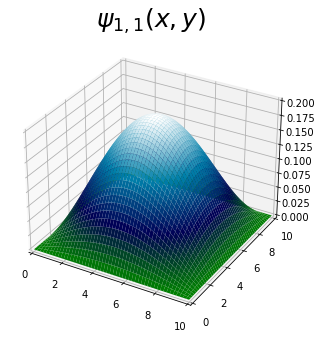

In [24]:
lx=10
ly=10

n=1
m=1

xs=np.arange(0,lx,.01)
ys=np.arange(0,ly,.01)

xmesh,ymesh = np.meshgrid(xs, ys)
zmesh = psi2d(n,m,xmesh,ymesh,lx,ly)

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.plot_surface(xmesh,ymesh,zmesh,cmap='ocean')
ax.set_title('$\psi_{'+str(n)+','+str(m)+'}(x,y)$', size=25)

ax.set_xlim(0,lx)
ax.set_ylim(0,ly)

plt.show()

## Exercise 3: Normal Distribution

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Create an $x$ and $y$ array of a normally distributed numbers. Plot them as the $x$ and $y$ coordinates on a scatter plot. Also make histograms along the $x$ and $y$ axes like this.

<img src="images/normals.png" alt="two dice" width="300"/>

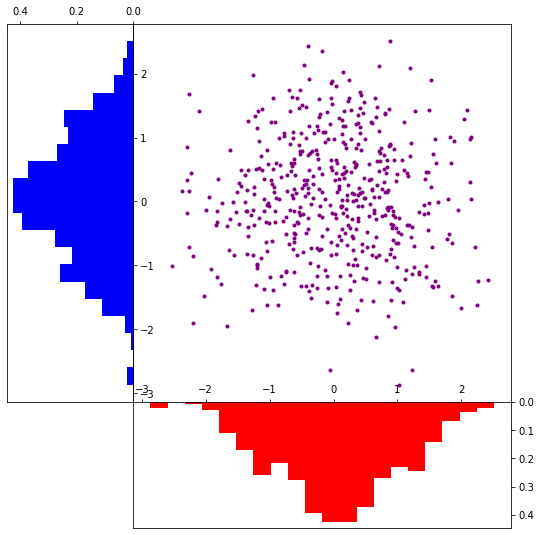

In [26]:
x = np.random.normal(0,1,500)
y = np.random.normal(0,1,500)

fig = plt.figure(figsize = (7,7))

points = fig.add_axes([.25,.25,.75,.75])
xhist = fig.add_axes([0,.25,.25,.75])
yhist = fig.add_axes([.25,0,.75,.25])

points.scatter(x, y, color='purple', marker = '.')

yhist.hist(y, density=True, bins=20, color='r')
yhist.invert_yaxis()
yhist.get_shared_x_axes().join(yhist, points)
yhist.yaxis.tick_right()
yhist.xaxis.tick_top()
points.set_xticklabels([])

xhist.hist(y, density=True, bins=20, color='b', orientation = 'horizontal')
xhist.invert_xaxis()
xhist.get_shared_x_axes().join(xhist, points)
xhist.xaxis.tick_top()
xhist.yaxis.tick_right()
points.set_yticklabels([])

plt.show()

## Exercise 4: Monte Carlo $\pi$ Estimation

Make a visualization of the process of estimating $\pi$ with a Monte Carlo Method.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


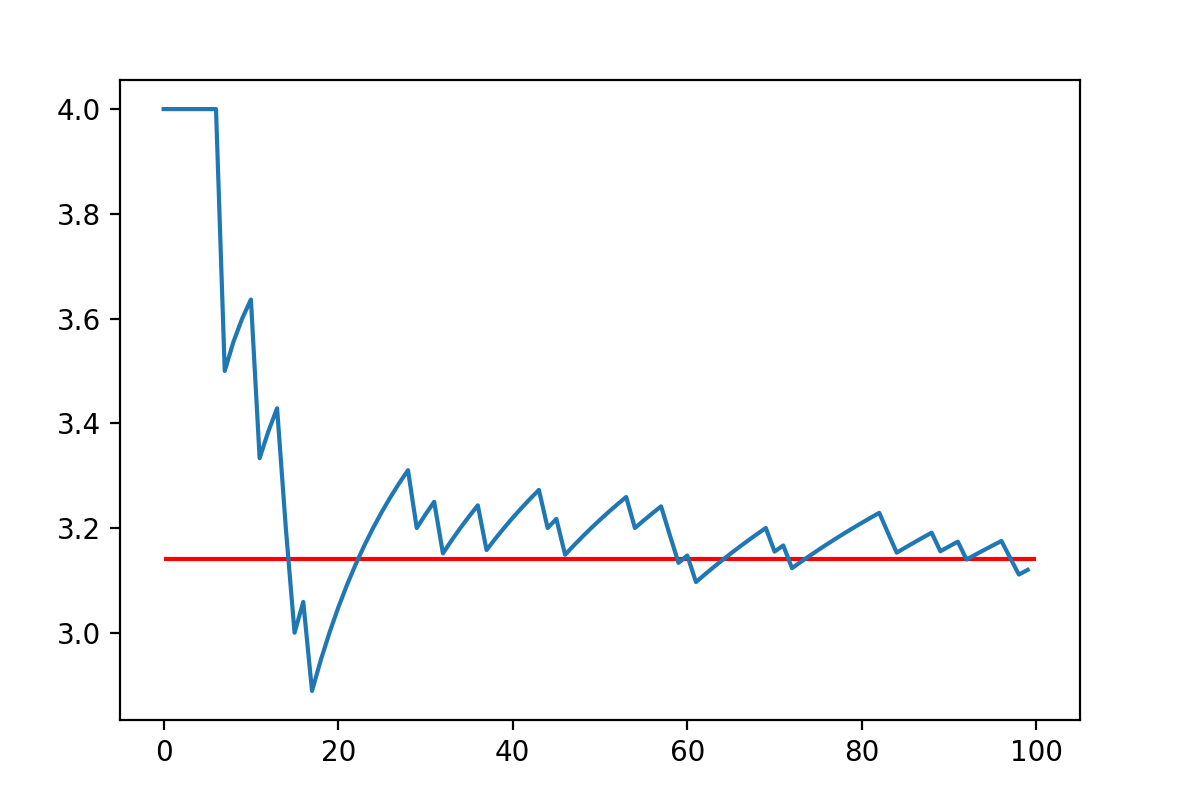

In [2]:
n = 100
x = rnd.random(n)
y = rnd.random(n)

successes = x**2 + y**2 < 1

trys = 4*np.cumsum(successes)/np.array(range(1,n+1))

fig = plt.figure(figsize=(6,4))

ax = fig.add_axes([.1,.1,.8,.8])

ax.hlines(np.pi,0,n,color='r')
ax.plot(np.arange(0,n,1),trys)

plt.show()

<IPython.core.display.Javascript object>


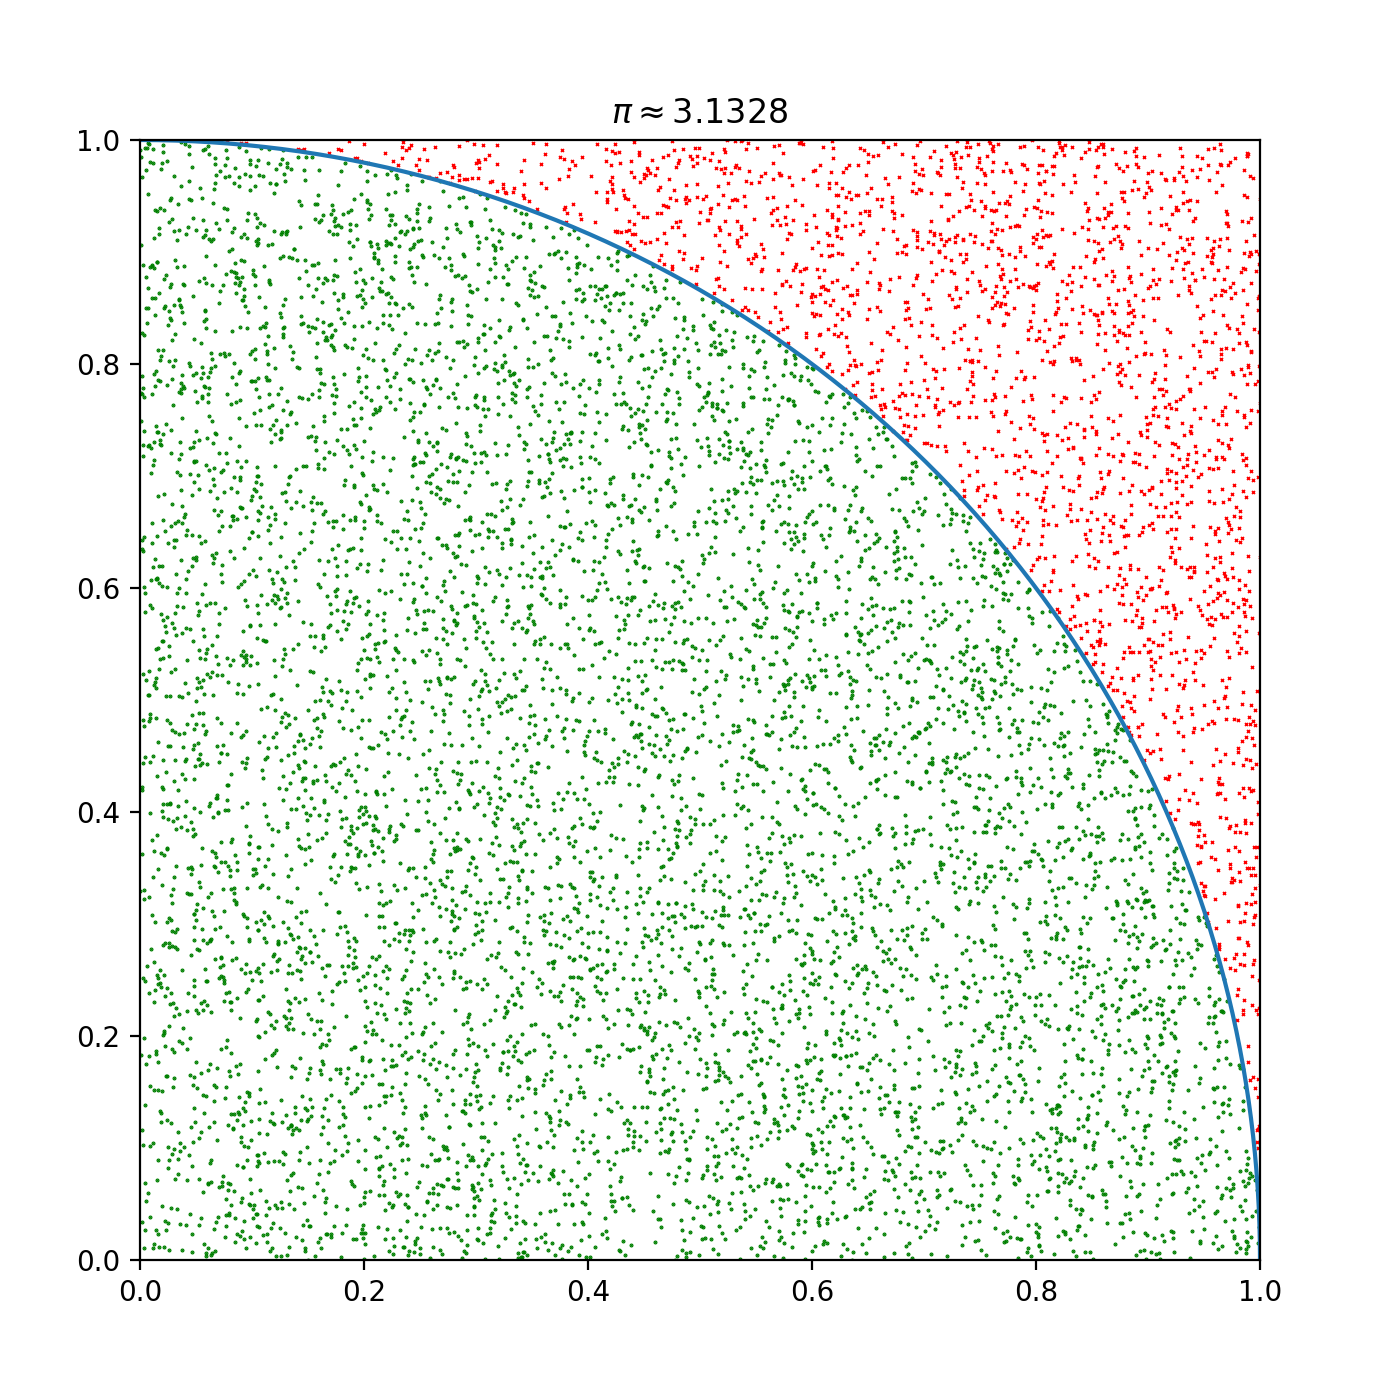

In [3]:
n = 10000
x = rnd.random(n)
y = rnd.random(n)

successes = x**2 + y**2 < 1

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8])

pi = 4*sum(successes)/n

theta = np.linspace(0,np.pi/2,100)

ax.set_title(r'$\pi \approx' + str(pi) +'$')
ax.plot(np.sin(theta),np.cos(theta))
ax.scatter(x[successes],y[successes],.2,c='g',marker='o')
ax.scatter(x[np.invert(successes)],y[np.invert(successes)],.2,c='r',marker='x')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.show()

<IPython.core.display.Javascript object>


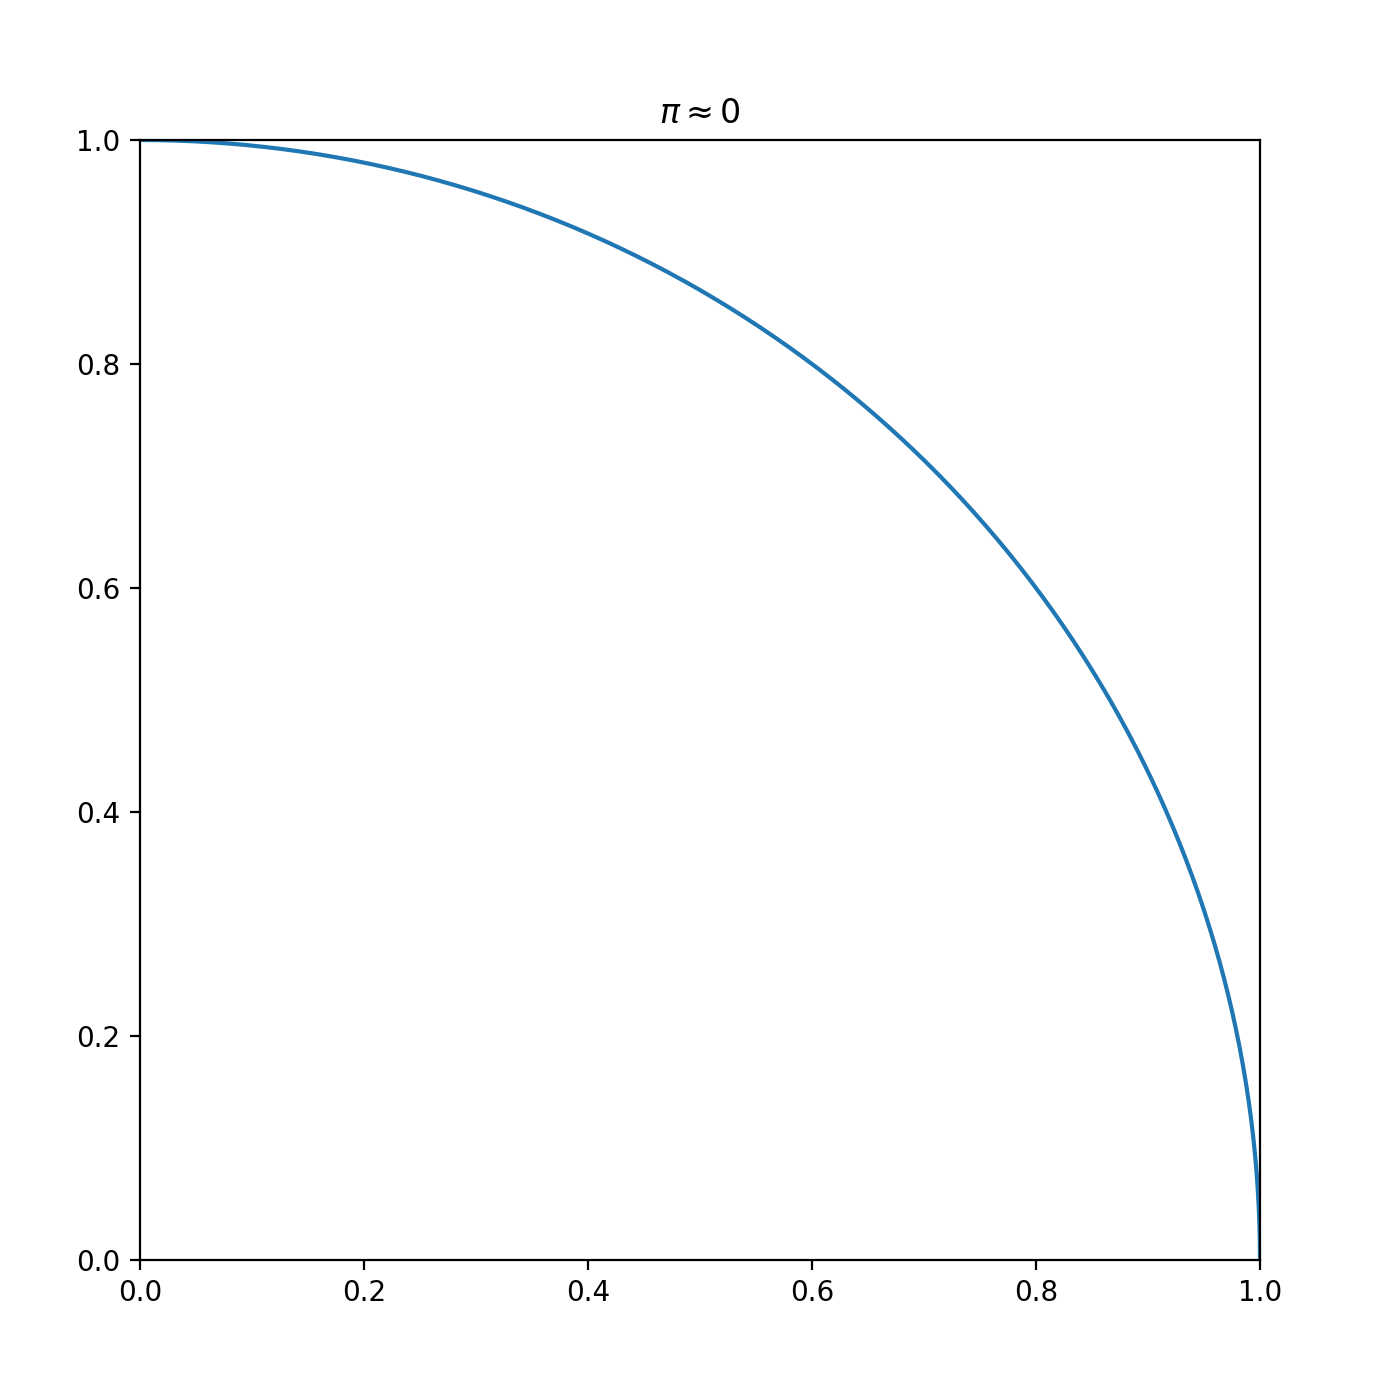

In [9]:
n = 10
x = rnd.random(n)
y = rnd.random(n)

successes = x**2 + y**2 < 1
x_successes = x[successes]
y_successes = y[successes]

fails = np.invert(successes)
x_fails = x[fails]
y_fails = y[fails]

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8])

pi = 4*sum(successes)/n

theta = np.linspace(0,np.pi/2,100)

ax.plot(np.sin(theta),np.cos(theta))

im1, = ax.plot([],[],'g.',markersize=3)
im2, = ax.plot([],[],'rx',markersize=3)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

def init():
    ax.set_title(r'$\pi \approx 0$')
    im1.set_data([], [])
    im2.set_data([], [])
    return im1,im2

def animate(i):
    ax.set_title(r'$\pi \approx '+ format(4*sum(successes[0:i])/i,'.3f') +'$')
    im1.set_data(x_successes[0:i], y_successes[0:i])
    im2.set_data(x_fails[0:i], y_fails[0:i])
    return im1,im2

anim = FuncAnimation(fig, animate, init_func=init, frames=10000, interval=.0001)

plt.show()

## Exercise 5: Ball Animation

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

Here I have a `Ball` class that where you input the initial position and speed. There are functions that evolve the ball in time and bounce the ball.

In [23]:
class Ball():
    def __init__(self, x=0, y=0, vx=0, vy=0):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def evolve(self,dt):
        self.x += self.vx * dt
        self.y += self.vy * dt
        
    def x_bounce(self):
        self.vx *= -.9
        
    def y_bounce(self):
        self.vy *= -.9

Make an animation where the ball is confined to a box and bounces each time a wall is hit. 

*Hint: To not get stuck in the wall don't go too fast and accompany each bounce with a small time evolution.*

<IPython.core.display.Javascript object>


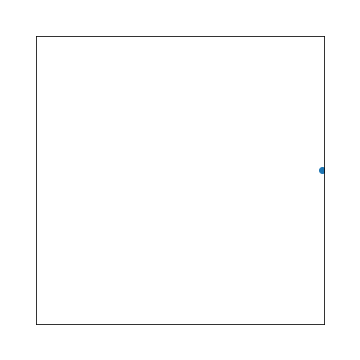

In [25]:
b = Ball(vx=5,vy=2)

fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

ax.set_xticks([])
ax.set_yticks([])

line, = ax.plot([], [], marker = 'o', ls = 'None')


def init():
    line.set_data([], [])
    return line,

def animate(i):
    b.evolve(.01)
    line.set_data(b.x, b.y)
    
    if np.abs(b.x)>1:
        b.x_bounce()
        b.evolve(.01)
        
    if np.abs(b.y)>1:
        b.y_bounce()
        b.evolve(.01)
    
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=3)

plt.show()